In [1]:
import matplotlib.pyplot as plt
from Functions_plotting import c1,c2,c3,c4,c5
import numpy as np
from matplotlib.lines import Line2D

In [2]:
# Yield bar plot
def yield_boxandwhisker(Xs,ax,Ys,col_type,linestyles):
        
    # Set linestyles
    if linestyles == True:
        ls = ['--','-',':']
    # Don't set linestyles
    elif linestyles == False:
        ls = ['--','-','--']
    cols = [c4,c5,c4]
        
    # Plot vertical line (tag if plot 1 for the legend)
    if col_type == 1:
        ax.plot([np.mean(Xs),np.mean(Xs)],[np.min(Ys),np.max(Ys)],color=c4,linewidth=10,alpha=0.4,solid_capstyle='butt',label = "Range of IPM outcomes")
    elif col_type in [2,3]:
        ax.plot([np.mean(Xs),np.mean(Xs)],[np.min(Ys),np.max(Ys)],color=c4,linewidth=10,alpha=0.4,solid_capstyle='butt')

    # Plot yield horizontal lines   
    for i in range(len(Ys)):
        ax.plot(Xs,[Ys[i],Ys[i]],color=cols[i],linestyle=ls[i],linewidth=3)
        
    # If poster version, add a legend
    if linestyles == False:
        ax.legend(["Range","Boundary values", "Default value"],loc = "upper right")
    
    return ax

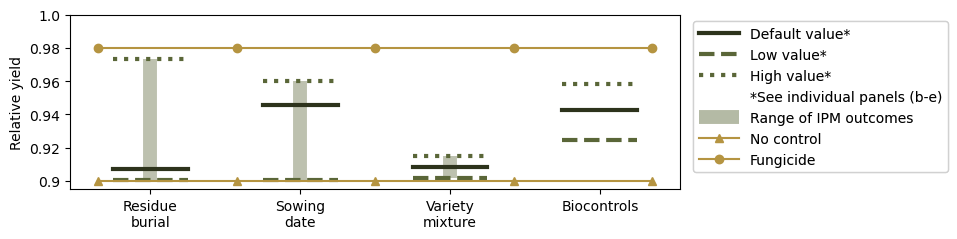

In [3]:
# Copy and paste the yields which were output in each of Fitting_1...4
Y1 = [0.9014147425781315, 0.9082814625093604, 0.914806855143612]
Y2 = [0.9003283668966523, 0.9456634547816977, 0.9602564724875514]
Y3 = [0.9003283189830485, 0.9070771997124738, 0.9730628233901871]
Y4 = [0.9246707944616883, 0.9427059344690464, 0.9579799686366183]


# Decide whether I want the different linestyles, or just a plain box and whisker
def linestyles(paper):
    fig,ax = plt.subplots(1,figsize=(7,2.5))

    # Order needs to be 3, 2, 1, 4
    ax = yield_boxandwhisker([0,0.5],ax,Y3,3,paper)
    ax = yield_boxandwhisker([1,1.5],ax,Y2,2,paper)
    ax = yield_boxandwhisker([2,2.5],ax,Y1,1,paper)
    ax = yield_boxandwhisker([3,3.5],ax,Y4,4,paper)
    ax.set_ylabel("Relative yield",fontsize='10')

    # Order needs to be 3, 2, 1, 4
    labels = ["Residue\nburial", "Sowing\ndate","Variety\nmixture" , "Biocontrols"]
    xcoords = [0.25,1.25,2.25,3.25]
    
    # Plot no control and fungicide if required
    n = 5
    ax.plot(np.linspace(-0.1,3.6,n),[0.900]*n,color=c2,linestyle='-',linewidth=1.5,marker='^',label="No control")
    ax.plot(np.linspace(-0.1,3.6,n),[0.980]*n,color=c2,linestyle='-',linewidth=1.5,marker='o',label="Fungicide")

    # Legend for new lines
    legh1,legl1 = ax.get_legend_handles_labels()
#     leg1 = ax.legend(handles=legh, labels=legl,bbox_to_anchor=(1.01, 0.6))
#     ax.add_artist(leg1)
    
    # Legend referring to other panels
    if paper == True:
        l1 = Line2D([0],[0],color=c5,linestyle='-',linewidth=3,label = "Default value*")
        l2 = Line2D([0],[0],color=c4,linestyle='--',linewidth=3,label = "Low value*")
        l3 = Line2D([0],[0],color=c4,linestyle=':',linewidth=3,label = "High value*")
        l4 = Line2D([0],[0],linestyle='',linewidth=0,label = "*See individual panels (b-e)")
        legh2 = [l1,l2,l3,l4]
        legl2 = [l1.get_label(),l2.get_label(),l3.get_label(),l4.get_label()]
    elif paper == False:
        l1 = Line2D([0],[0],color=c5,linestyle='-',linewidth=3,label = "Median/default value")
        l2 = Line2D([0],[0],color=c4,linestyle='--',linewidth=3,label = "Boundary values")
        legh2 = [l1,l2]
        legl2 = [l1.get_label(),l2.get_label()]

    leg = ax.legend(handles=legh2+legh1, labels=legl2+legl1,handlelength=2.9,bbox_to_anchor=(1.01, 1))
    ax.add_artist(leg)
    
    ax.set_xticks(xcoords,labels = labels,fontsize='10')
    ax.set_yticks(ax.get_yticks(),np.round(ax.get_yticks(),2),fontsize='10')
    ax.set_ylim([0.895,1])
    
    fig.subplots_adjust(right=1.2)
    plt.tight_layout()
    return fig

# Run the version for paper
fig = linestyles(True)
fig.savefig('Figures/Manuscript_final/fig_1controlyields.pdf', dpi=400,bbox_inches='tight')

# # Run the version for poster
# fig = linestyles(False)
# fig.savefig('Figures/fig_1controlyields_poster.pdf', dpi=400)

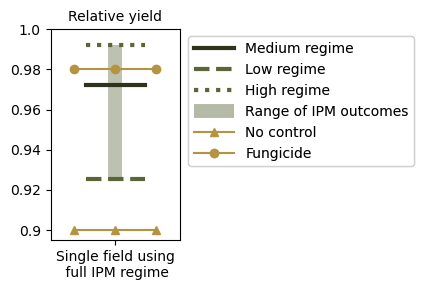

In [4]:
# Plot for the single field full regime
Yall = [0.9254997780858897, 0.9723632148254476, 0.9923589962306695]

# Decide whether I want the different linestyles, or just a plain box and whisker
def linestyles(paper):
    fig,ax = plt.subplots(1,figsize=(2,3))

    # Order needs to be 3, 2, 1, 4
    ax = yield_boxandwhisker([0,0.5],ax,Yall,1,paper)
    ax.set_title("Relative yield",fontsize='10')

    # Order needs to be 3, 2, 1, 4
    labels = ["Single field using\n full IPM regime"]
    xcoords = [0.25]
    
    # Plot no control and fungicide if required
    if paper == True:
#         ax.plot([-2,-1.5],[0.717]*2,color=c2,linestyle='-',linewidth=3)
#         ax.scatter([-1.75],[0.717],marker='^',c=c2,s=50)
#         ax.plot([-1,-0.5],[0.978]*2,color=c2,linestyle='-',linewidth=3)
#         ax.scatter([-0.75],[0.978],marker='o',c=c2,s=50)
#         labels = ["No control", "Fungicide"]+labels
#         xcoords = [-1.75,-0.75] + xcoords
        n = 3
        ax.plot(np.linspace(-0.1,0.6,n),[0.900]*n,color=c2,linestyle='-',linewidth=1.5,marker='^',label="No control")
        ax.plot(np.linspace(-0.1,0.6,n),[0.980]*n,color=c2,linestyle='-',linewidth=1.5,marker='o',label="Fungicide")
    
    # Legend for new lines
    legh1,legl1 = ax.get_legend_handles_labels()
#     leg1 = ax.legend(handles=legh, labels=legl,bbox_to_anchor=(1.01, 0.6))
#     ax.add_artist(leg1)
    
    # Legend referring to other panels
    if paper == True:
        l1 = Line2D([0],[0],color=c5,linestyle='-',linewidth=3,label = "Medium regime")
        l2 = Line2D([0],[0],color=c4,linestyle='--',linewidth=3,label = "Low regime")
        l3 = Line2D([0],[0],color=c4,linestyle=':',linewidth=3,label = "High regime")
        legh2 = [l1,l2,l3]
        legl2 = [l1.get_label(),l2.get_label(),l3.get_label()]
    elif paper == False:
        l1 = Line2D([0],[0],color=c5,linestyle='-',linewidth=3,label = "Median/default value")
        l2 = Line2D([0],[0],color=c4,linestyle='--',linewidth=3,label = "Boundary values")
        legh2 = [l1,l2]
        legl2 = [l1.get_label(),l2.get_label()]

    leg = ax.legend(handles=legh2+legh1, labels=legl2+legl1,handlelength=2.9,bbox_to_anchor=(1.01, 1))
    ax.add_artist(leg)
    
    ax.set_xticks(xcoords,labels = labels,fontsize='10')
    ax.set_yticks(ax.get_yticks(),np.round(ax.get_yticks(),2),fontsize='10')
    ax.set_ylim([0.895,1])
    ax.set_xlim([-0.3,0.8])
    
    fig.subplots_adjust(right=1.2)
    plt.tight_layout()
    return fig

# Run the version for paper
fig = linestyles(True)
fig.savefig('Figures/Manuscript_final/fig_singlefarmyields.pdf', dpi=400,bbox_inches='tight')